In [3]:
###---- Reading company data and importing relevent lib
import pandas as pd
import numpy as np 
import re
companies = pd.read_csv("../Case Study -1/companies.txt", sep="\t",encoding = "ISO-8859-1")

In [4]:
###----- Checking what kind of data it have
companies.describe()
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Checkpoint 1: Data Cleaning

In [5]:
###----- Converting required col to str dtype and removing leading and trailing space
companies['name'] = companies.name.astype(str)
companies['name'] = companies.name.str.strip()
companies['permalink'] = companies.permalink.astype(str)
companies['permalink'] = companies.permalink.str.strip()

In [6]:
###----- Cleaning data for special characters and converting all values to lower case

companies.permalink = companies.permalink.apply(' '.join).str.replace('[^A-Za-z0-9]+','')
companies.name = companies.name.apply(' '.join).str.replace('[^A-Za-z0-9]+','')
companies.name = companies.name.str.lower()
companies.permalink = companies.permalink.str.lower()

In [7]:
###----- checking for missing data
companies.isnull().sum()

permalink            0
name                 0
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [8]:
###----- checking for missing data across row if anything is completely missing will remove that row
companies.isnull().all(axis=0).sum()

0

Note: We will not delete any row as no row is completely empty.

In [9]:
###----- Checking percentage of empty value column wise.
round(100*(companies.isnull().sum()/len(companies.index)),2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

In [10]:
###----dropping founded_at col,state_code,region,city as having high percentage of null values ALso do not have much impact on our business case
companies = companies.drop('founded_at',axis = 1)
companies = companies.drop('state_code',axis = 1)
companies = companies.drop('region',axis = 1)
companies = companies.drop('city',axis = 1)


In [11]:
### --- checking unique permalink, converting output to list for easy cal
count_unique_permalink = companies.permalink.unique().tolist()
len(count_unique_permalink)

66290

In [12]:
### --- checking unique company name, converting output to list for easy cal
count_unique_name = companies.name.unique().tolist()
len(count_unique_name)


65961

In [13]:
### --- checking duplicate values of our unique key permalink mapping it with imp parameter of our analysis,to see if complete row is duplicate we can del
companies[companies.duplicated(['permalink','category_list','country_code','region'],keep = False)]

,permalink,name,homepage_url,category_list,status,country_code
5875,organizationbarkco,barkco,https://barkbox.com/,Pets,operating,USA
5876,organizationbarkco,barkco,http://bark.co,Pets,operating,USA
13867,organizationcrosscurrent,crosscurrent,http://crosscurrentanalytics.com,Software,operating,USA
13880,organizationcrosscurrent,crosscurrent,http://www.crosscurrentinc.com,Software,operating,USA
16691,organizationdunenetworks,dunenetworks,NaN,Semiconductors,operating,USA
16693,organizationdunenetworks,dunenetworks,http://www.dunenetworks.com,Semiconductors,acquired,USA
45924,organizationpureenergysolutions,pureenergysolutions,http://pureenergy.com,Hardware + Software,operating,USA
45942,organizationpureenergysolutions,pureenergysolutions,http://www.shoppureenergy.com,Hardware + Software,closed,USA


From above code pretty clear no row have complete duplicate data

In [14]:
###----- Checking final data after rmoving all duplicates
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 6 columns):
permalink        66368 non-null object
name             66368 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
dtypes: object(6)
memory usage: 3.0+ MB


In [15]:
### --- checking duplicate names,observed that diffrent companies have same name but diffrent permalink hence they are diffrent from each other
companies[companies.duplicated(['name'],keep = False)]

,permalink,name,homepage_url,category_list,status,country_code
8,organization1,oneinc,http://whatis1.com,Mobile,operating,USA
281,organization3divaz2,3divaz,http://www.3divaz.ch/Home,NaN,closed,NaN
282,organization3divaz3,3divaz,http://www.3divaz.ch/Home,NaN,operating,CHE
398,organization5minutes,5minutes,NaN,Games,operating,CHN
451,organization5minutes,5minutes,http://5minutes.to,Art|Curated Web|Photography|Social Media,operating,GBR
1526,organizationadtena,adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN
1527,organizationadtena2,adtena,http://adtena.com,NaN,closed,NaN
1995,organizationagora3,agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA
1996,organizationagora6,agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA
2459,organizationalike,alike,http://alikeapp.com,Curated Web,acquired,USA


In [16]:
###----- Checking percentage of empty value cafter clean up column wise.
round(100*(companies.isnull().sum()/len(companies.index)),2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
dtype: float64

Will not del any row for remaning null values as it will impact unique permalink

In [17]:
### --- checking unique permalink again after all cleaning done, converting output to list for easy cal
count_unique_permalink = companies.permalink.unique().tolist()
len(count_unique_permalink)

66290

In [19]:
###---- Reading rounds2.csv data and importing relevent lib
pd.options.display.float_format = '{:.2f}'.format
rounds2 = pd.read_csv("../Case Study -1/rounds2.csv",encoding = "ISO-8859-1")

In [20]:
###----- Checking what kind of data rounds2 have
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [21]:
###----- Cleaning and removing special character for rounds2 data(as performed in rounds2.ipynb file)
rounds2.company_permalink = rounds2.company_permalink.apply(' '.join).str.replace('[^A-Za-z0-9]+','')
rounds2.company_permalink = rounds2.company_permalink.str.strip()
rounds2.company_permalink = rounds2.company_permalink.str.lower()
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,organizationzzzzappcom,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.00
114945,organizationzzzzappcom,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.00
114946,organizationeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan
114947,organizationasys2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.00
114948,organizationnovatiffreklamvetantmhizmetleritic,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.00


In [22]:
###---Checking null values
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

Funding_round_code is having highest percentage of null value but can't delete this col directly as on basis of this col around 1000 row have unique funding_round_permalink.(analysis can be found below), will drop this later after merging to get all unique details captured.

In [23]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [24]:
### --- checking unique funding_round_permalink, converting output to list and cal length
len(rounds2.funding_round_permalink.unique().tolist())


114949

In [25]:
### --- checking unique company_permalink, converting output to list and cal length
len(rounds2.company_permalink.unique().tolist())

66290

In [26]:
###--- Checking duplicates just to confirm above count
len(rounds2[rounds2.duplicated(['funding_round_permalink'],keep = 'first')])

0

In [27]:
###----Checking duplicate company_permalink
rounds2[rounds2.duplicated(['company_permalink','funding_round_type','raised_amount_usd','funding_round_code','funding_round_type'],keep = False)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
25,organization1020media,/funding-round/8025ee9c11a586eac4a234ddec7beb30,debt_financing,NaN,18-06-2009,500000.00
26,organization1020media,/funding-round/a884bf8326b9fd59789c0f74a28dbc3b,debt_financing,NaN,28-12-2011,500000.00
63,organization10alike,/funding-round/36812b11cf7351e5184c59fecd828dea,seed,NaN,01-01-2013,nan
64,organization10alike,/funding-round/88d987f9cb2c320b809caafe43b8491b,seed,NaN,01-01-2014,nan
257,organization247card,/funding-round/b28398ef32cb54558df7d678251f0e7d,venture,A,25-10-2010,nan
258,organization247card,/funding-round/c2d5008bcb82fec57c310663b0979c31,venture,A,24-10-2011,nan
268,organization24fab,/funding-round/e67f480303e9ad9aa4dffce1ea87a1b8,venture,NaN,20-07-2015,nan
269,organization24fab,/funding-round/f7667e10f2d6381f4886fdbde2dbcbfb,venture,NaN,11-09-2014,nan
314,organization2duche,/funding-round/910497792674d727ed951972dcb9fc58,undisclosed,NaN,01-08-2010,nan
315,organization2duche,/funding-round/c4dc6a5b1d3124ab1ee3d234889f5bd1,undisclosed,NaN,01-06-2006,nan


Can't delete any duplicate as all have unique funding_round_permalink.And will change no of investment count in future calculation.

Now our Companies and Rounds2 are ready to merge, Creating master_frame as main df

In [28]:
###-----Merging companies and round2 dataframe
master_frame = pd.merge(rounds2,companies,how= 'inner',left_on = 'company_permalink', right_on = 'permalink')

In [29]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code
0,organizationfame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,organizationfame,fame,http://livfame.com,Media,operating,IND
1,organizationqounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,organizationqounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
2,organizationqounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,organizationqounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
3,organizationtheoneoftheminc,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,organizationtheoneoftheminc,theoneoftheminc,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN
4,organization06com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,organization06com,06com,http://www.0-6.com,Curated Web,operating,CHN


In [30]:
###---Check how master_frame is looking
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115200 entries, 0 to 115199
Data columns (total 12 columns):
company_permalink          115200 non-null object
funding_round_permalink    115200 non-null object
funding_round_type         115200 non-null object
funding_round_code         31217 non-null object
funded_at                  115200 non-null object
raised_amount_usd          95169 non-null float64
permalink                  115200 non-null object
name                       115200 non-null object
homepage_url               109038 non-null object
category_list              111773 non-null object
status                     115200 non-null object
country_code               106498 non-null object
dtypes: float64(1), object(11)
memory usage: 11.4+ MB


In [31]:
###----Any row where all values all null
master_frame.permalink.isnull().any().sum()

0

In [32]:
###--Check any company from companies df which is not mapping to rounds2 companies value.
master_frame[pd.isnull(master_frame['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code


In [33]:
###---percentage of null values in columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.90
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.35
category_list              2.97
status                     0.00
country_code               7.55
dtype: float64

In [34]:
###---Droping funding_round_code column as it have very high value of null values and can't be impute and Column permalink as it is duplicate due to merge
master_frame = master_frame.drop('funding_round_code',axis = 1)
master_frame = master_frame.drop('permalink',axis = 1)

In [35]:
###---Dropping rows where price and country code is null which is around 17% and 9.5% of data,And can't compute this high value
master_frame = master_frame[~pd.isnull(master_frame['raised_amount_usd'])]
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]

Note:Reason for dropping only NAN values of price and country code is our analysis is completely dependent on these 2 col and will have significant impact of null vlaues.

In [36]:
###---percentage of null values in columns after cleaning null
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              3.80
category_list             0.66
status                    0.00
country_code              0.00
dtype: float64

In [37]:
###---Verify any null values left for price
master_frame[pd.isnull(master_frame['raised_amount_usd'])]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code


In [38]:
###---Check final master_frame after cleaning
master_frame.tail()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
115193,organizationzzzzappcom,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.00,zzzzappwirelessltd,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV
115194,organizationzzzzappcom,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.00,zzzzappwirelessltd,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV
115195,organizationzzzzappcom,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.00,zzzzappwirelessltd,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV
115196,organizationzzzzappcom,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.00,zzzzappwirelessltd,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV
115198,organizationasys2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.00,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA


In [39]:
###--- Checking details of funding round type like total and average
df_type = master_frame.groupby('funding_round_type')
round(df_type.raised_amount_usd.count()).sort_values()

funding_round_type
secondary_market            29
non_equity_assistance       63
post_ipo_debt              151
product_crowdfunding       333
post_ipo_equity            601
equity_crowdfunding       1137
convertible_note          1330
undisclosed               1358
private_equity            1837
grant                     1982
angel                     4435
debt_financing            6540
seed                     21281
venture                  48219
Name: raised_amount_usd, dtype: int64

In [40]:
round(df_type.raised_amount_usd.mean()).sort_values()

funding_round_type
non_equity_assistance      471446.00
equity_crowdfunding        512258.00
seed                       748159.00
angel                      967587.00
convertible_note          1332205.00
product_crowdfunding      1485689.00
grant                     4501742.00
venture                  11739961.00
undisclosed              15794196.00
debt_financing           17179848.00
post_ipo_equity          66018794.00
private_equity           73550171.00
secondary_market         81527204.00
post_ipo_debt           169451790.00
Name: raised_amount_usd, dtype: float64

In [41]:
###---To get fraction of funding round type globally, calculating total no of investments
len(master_frame.funding_round_permalink.unique())

89119

In [42]:
###----Fraction of total investment globally in all funding round type
100 * (df_type.funding_round_permalink.count()/len(master_frame.funding_round_permalink.unique()))

funding_round_type
angel                    4.98
convertible_note         1.49
debt_financing           7.34
equity_crowdfunding      1.28
grant                    2.22
non_equity_assistance    0.07
post_ipo_debt            0.17
post_ipo_equity          0.67
private_equity           2.06
product_crowdfunding     0.37
secondary_market         0.03
seed                    23.88
undisclosed              1.52
venture                 54.11
Name: funding_round_permalink, dtype: float64

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
df = master_frame[master_frame['funding_round_type'].isin (['venture','seed','private_equity'])]

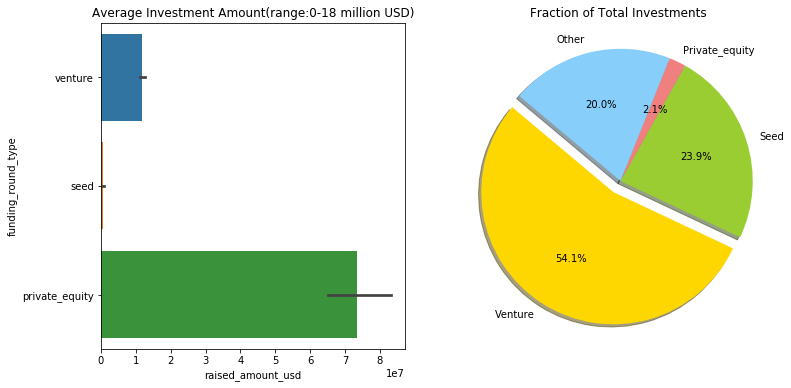

In [44]:
plt.figure(figsize=(12, 6))

# subplot 1: statistic=Average Amount of Investment
plt.subplot(1, 2, 1)
sns.barplot(y='funding_round_type', x='raised_amount_usd', data = df)
plt.xrange = (5,20)
plt.title("Average Investment Amount(range:0-18 million USD)")

# subplot 2: statistic= Fraction of Total number of Investment
plt.subplot(1, 2, 2)
labels = 'Venture', 'Seed', 'Private_equity','Other'
sizes = [54.11, 23.88, 2.06, (100-(54.11+23.88+2.06)) ]
colors = ['gold', 'yellowgreen','lightcoral','lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Fraction of Total Investments")
plt.axis('equal')
plt.show()



Note:From above code, It is clear that venture type have around 11-12 million mean value and most of the investments are happening in it around 54%, Hence most suitable for Spark fund as per business case

Checkpoint 2: Funding Type Analysis

In [45]:
###----Now filtering all data with funding_round_type as venture which is most suitable as per analysis
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48219 entries, 0 to 115192
Data columns (total 10 columns):
company_permalink          48219 non-null object
funding_round_permalink    48219 non-null object
funding_round_type         48219 non-null object
funded_at                  48219 non-null object
raised_amount_usd          48219 non-null float64
name                       48219 non-null object
homepage_url               46032 non-null object
category_list              47908 non-null object
status                     48219 non-null object
country_code               48219 non-null object
dtypes: float64(1), object(9)
memory usage: 4.0+ MB


In [46]:
###---Verifying null values
master_frame.isnull().sum()/len(master_frame.index)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              0.05
category_list             0.01
status                    0.00
country_code              0.00
dtype: float64

Checkpoint 3: Country Analysis

In [47]:
###--- Grouping master_frame by country code to identify highest total fundings across all countries
master_frame['country_code'] = master_frame.country_code.str.upper()
df_country = master_frame.groupby(['country_code'])
df_country.head()

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,organizationfame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,fame,http://livfame.com,Media,operating,IND
4,organization06com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,06com,http://www.0-6.com,Curated Web,operating,CHN
8,organization0ndinebiomedicalinc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,ondinebiomedicalinc,http://ondinebio.com,Biotechnology,operating,CAN
10,organization0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,h2oai,http://h2o.ai/,Analytics,operating,USA
11,organization0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,h2oai,http://h2o.ai/,Analytics,operating,USA
12,organization0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,h2oai,http://h2o.ai/,Analytics,operating,USA
22,organization1mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA
28,organization10minuteswith,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.00,10minuteswith,http://10minuteswith.com,Education,operating,GBR
34,organization1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.00,1000memories,http://1000memories.com,Curated Web,acquired,USA
46,organization1001menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,04-11-2015,6602694.00,zenchef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA


In [48]:
###---Filtering top 9 countries based on highest total funding 
top = pd.DataFrame(round(df_country.raised_amount_usd.sum()).sort_values(ascending = False).nlargest(9))
top.rename(columns = {'raised_amount_usd':'total_funding_usd'}, inplace = True)
top


,total_funding_usd
country_code,
USA,423395566411.00
CHN,39835418773.00
GBR,20350797416.00
IND,14436818105.00
CAN,9597775814.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3369676611.00


Note: From above analysis top9 countries are listed above also Top 3 English speaking from doc are USA,GBR and IND

In [49]:
###----Resetting index for merge purpose
top = top.reset_index()
pd.options.display.float_format = '{:.2f}'.format
top

,country_code,total_funding_usd
0,USA,423395566411.00
1,CHN,39835418773.00
2,GBR,20350797416.00
3,IND,14436818105.00
4,CAN,9597775814.00
5,FRA,7259536732.00
6,ISR,6907514579.00
7,DEU,6346959822.00
8,JPN,3369676611.00


In [50]:
###----Merging top with master_frame to get top9 dataframe
top9 = pd.merge(master_frame,top[['country_code','total_funding_usd']],how ='inner',left_on ='country_code',right_on = 'country_code')


Top9 DF is ready showing the highest total funding across ALL sectors for the venture investment type

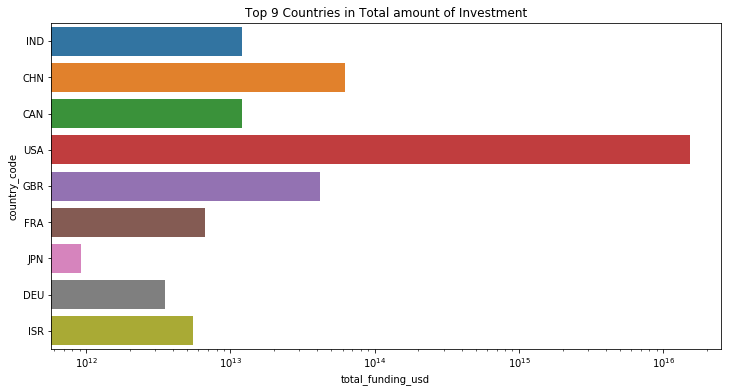

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x= 'total_funding_usd',y='country_code',data = top9,estimator=np.sum)
plt.title("Top 9 Countries in Total amount of Investment")
plt.xscale('log')

So for above chart it is clear top3 countries are USA,CHN and GBR, but CHN is not english speaking country so will take next one which is IND.

In [52]:
top9.tail()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,total_funding_usd
44460,organizationzeek2,/funding-round/896162faedf5fc4a22cb843df3415114,venture,18-05-2015,3000000.00,zeek,http://www.zeek.me,E-Commerce|Mobile Commerce,operating,ISR,6907514579.00
44461,organizationzikbit,/funding-round/8f3794299145cb759657c82a00675555,venture,15-12-2008,8000000.00,zikbit,NaN,Semiconductors,operating,ISR,6907514579.00
44462,organizationzooz,/funding-round/14b29f58e9d9c72e17d56e00f7c79f64,venture,16-07-2014,12000000.00,zooz,http://www.zooz.com,Developer APIs|E-Commerce|Payments|Startups|Ve...,operating,ISR,6907514579.00
44463,organizationzooz,/funding-round/eef74f885a320f0e27c9e502719e09c7,venture,23-04-2013,3000000.00,zooz,http://www.zooz.com,Developer APIs|E-Commerce|Payments|Startups|Ve...,operating,ISR,6907514579.00
44464,organizationzrro,/funding-round/48aa93b25d52718fc034c5fe84eeb2bc,venture,01-01-2011,2000000.00,zrro,http://zrrobox.com,Electronics,operating,ISR,6907514579.00


In [53]:
round(top9.isnull().sum()/len(top9.index),2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              0.05
category_list             0.01
status                    0.00
country_code              0.00
total_funding_usd         0.00
dtype: float64

In [54]:
###---- top 3 eng speaking countries from Official language doc provided. Putting them in list and filtering Top9 to Top3eng df
top3_eng_List = ['USA','GBR','IND']  
Top3eng = top9[top9['country_code'].isin (top3_eng_List)]

In [55]:
Top3eng.tail()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,total_funding_usd
41914,organizationzubka,/funding-round/37fbbea761f614e5a3254d314cb2eba1,venture,09-02-2007,3919186.00,zubka,http://www.zubka.com,Consulting,closed,GBR,20350797416.00
41915,organizationzutux,/funding-round/281d898f0e2f5d0d964fbde6f3a10313,venture,16-04-2012,1503926.00,zutux,http://www.zutux.com,E-Commerce|Furniture,operating,GBR,20350797416.00
41916,organizationzyncd,/funding-round/3549f5a481f83610044a4226926acf5a,venture,01-09-2014,144451.00,zyncd,http://www.zyncd.com,Crowdsourcing|Knowledge Management,operating,GBR,20350797416.00
41917,organizationzynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,09-07-2014,8400000.00,zynstra,http://www.zynstra.com,Software,operating,GBR,20350797416.00
41918,organizationzynstra,/funding-round/129127802dd48be42d6cd45f65895245,venture,12-09-2013,3800000.00,zynstra,http://www.zynstra.com,Software,operating,GBR,20350797416.00


In [56]:
Top3eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39096 entries, 0 to 41918
Data columns (total 11 columns):
company_permalink          39096 non-null object
funding_round_permalink    39096 non-null object
funding_round_type         39096 non-null object
funded_at                  39096 non-null object
raised_amount_usd          39096 non-null float64
name                       39096 non-null object
homepage_url               37228 non-null object
category_list              38873 non-null object
status                     39096 non-null object
country_code               39096 non-null object
total_funding_usd          39096 non-null float64
dtypes: float64(2), object(9)
memory usage: 3.6+ MB


Checkpoint 4: Sector Analysis 1

In [57]:
###--As per requirement Splitting Category list and picking first value, storing it in primary_sector col
Top3eng['primary_sector'] = Top3eng['category_list'].str.split('|').str[0]

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
###--- Checking any null are same in both col.
Top3eng.primary_sector.isnull().sum()
Top3eng.category_list.isnull().sum()

223

In [59]:
Top3eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39096 entries, 0 to 41918
Data columns (total 12 columns):
company_permalink          39096 non-null object
funding_round_permalink    39096 non-null object
funding_round_type         39096 non-null object
funded_at                  39096 non-null object
raised_amount_usd          39096 non-null float64
name                       39096 non-null object
homepage_url               37228 non-null object
category_list              38873 non-null object
status                     39096 non-null object
country_code               39096 non-null object
total_funding_usd          39096 non-null float64
primary_sector             38873 non-null object
dtypes: float64(2), object(10)
memory usage: 3.9+ MB


In [61]:
###---Reading mapping file
mapping = pd.read_csv("../Case Study -1/mapping.csv",encoding = "ISO-8859-1")

In [62]:
###---Converting Category list to string and removing extra space
mapping.category_list = mapping.category_list.astype(str)
mapping.category_list = mapping.category_list.str.strip()
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,nan,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Note: In Mapping many category words are not matching and 'na' of any word is getting rplace by '0',for eg.Analytics became A0lytics. So below code will correct this issue

In [63]:
#replace 0 in the beginning of a word with 'Na'
mapping['category_list'] = mapping['category_list'].apply(lambda category: re.sub('^0','Na',category))
#replace all other 0s in words with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda category: re.sub('0','na',category))

In [64]:
###---Checking specific positions to verify above changes reflected
mapping[270:280]
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              688 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [65]:
###---In order to map category list to its main sector,setting category list at index and dropping Index column
mapping = mapping.reset_index().set_index('category_list')
mapping = mapping.drop('index',axis = 1)

In [66]:
###---Function to fetch col name where row vlaue is maximum.
def returncolname(row, colnames):
    return colnames[np.argmax(row.values)]
mapping['main_sector'] = mapping.apply(lambda x : returncolname(x, mapping.columns), axis=1)

In [67]:
###----Getting index back for merging purpose
mapping.reset_index(inplace = True)
mapping['category_list'] = mapping.category_list.astype(str)

In [68]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,nan,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [69]:
###---Validating null values
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
main_sector                                0
dtype: int64

In [70]:
###---For merging setting both key as str
Top3eng.head()
mapping['category_list'] = mapping.category_list.astype(str)

In [71]:
###---Merging top3eng with mapping to get main sector data for each primary sector
final_master = pd.merge(Top3eng,mapping[['category_list','main_sector']],how = 'left',left_on ='primary_sector',right_on = 'category_list')

In [72]:
final_master.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector,category_list_y,main_sector
0,organizationfame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,fame,http://livfame.com,Media,operating,IND,14436818105.00,Media,Media,Entertainment
1,organization21diamondsindia,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,14436818105.00,E-Commerce,E-Commerce,Others
2,organization247learningprivate,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.00,24x7learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,14436818105.00,EdTech,EdTech,Others
3,organization3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,3D,Manufacturing
4,organization3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,3D,Manufacturing


In [73]:
###--Drop duplicate col
final_master = final_master.drop('category_list_y',axis = 1)

In [74]:
###---Drop null values as we only need 8 main sectors
final_master = final_master[~pd.isnull(final_master['main_sector'])]

In [75]:
final_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38858 entries, 0 to 39095
Data columns (total 13 columns):
company_permalink          38858 non-null object
funding_round_permalink    38858 non-null object
funding_round_type         38858 non-null object
funded_at                  38858 non-null object
raised_amount_usd          38858 non-null float64
name                       38858 non-null object
homepage_url               37060 non-null object
category_list_x            38858 non-null object
status                     38858 non-null object
country_code               38858 non-null object
total_funding_usd          38858 non-null float64
primary_sector             38858 non-null object
main_sector                38858 non-null object
dtypes: float64(2), object(11)
memory usage: 4.2+ MB


In [76]:
###Checking vlaues grouped by country and main sector
countcheck =final_master.groupby(['country_code','main_sector']).raised_amount_usd.agg('count').to_frame('count').reset_index()
countcheck.sort_values(by = 'count',ascending = False)

,country_code,main_sector,count
22,USA,Others,8325
17,USA,Cleantech / Semiconductors,7998
23,USA,"Social, Finance, Analytics, Advertising",7257
21,USA,"News, Search and Messaging",4379
19,USA,Health,3271
20,USA,Manufacturing,2456
18,USA,Entertainment,1795
6,GBR,Others,516
16,USA,Automotive & Sports,505
1,GBR,Cleantech / Semiconductors,442


In [77]:
###--merged data frame with each primary sector mapped to its main sector
final_master.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector,main_sector
0,organizationfame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,fame,http://livfame.com,Media,operating,IND,14436818105.00,Media,Entertainment
1,organization21diamondsindia,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,14436818105.00,E-Commerce,Others
2,organization247learningprivate,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.00,24x7learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,14436818105.00,EdTech,Others
3,organization3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,Manufacturing
4,organization3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,Manufacturing


Now our Final_master df is ready having final top3 countries with venture type funding

Checkpoint 5: Sector Analysis 2

In [78]:
###---Creating dataframe based on Top 3 countries
USA = final_master[final_master['country_code'] == 'USA']

In [79]:
GBR = final_master[final_master['country_code'] == 'GBR']


In [80]:
IND = final_master[final_master['country_code'] == 'IND']


In [81]:
USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35986 entries, 829 to 37032
Data columns (total 13 columns):
company_permalink          35986 non-null object
funding_round_permalink    35986 non-null object
funding_round_type         35986 non-null object
funded_at                  35986 non-null object
raised_amount_usd          35986 non-null float64
name                       35986 non-null object
homepage_url               34293 non-null object
category_list_x            35986 non-null object
status                     35986 non-null object
country_code               35986 non-null object
total_funding_usd          35986 non-null float64
primary_sector             35986 non-null object
main_sector                35986 non-null object
dtypes: float64(2), object(11)
memory usage: 3.8+ MB


In [82]:
###----Cal total amount invested and no of invenstment happened for USA
countUSA = USA.groupby(['main_sector']).raised_amount_usd.agg('count').to_frame('total_investment').reset_index()
sumUSA = USA.groupby(['main_sector']).raised_amount_usd.agg('sum').to_frame('total_amount_invested').reset_index()
pd.options.display.float_format = '{:.2f}'.format
sumUSA

,main_sector,total_amount_invested
0,Automotive & Sports,11632164696.00
1,Cleantech / Semiconductors,119945874301.00
2,Entertainment,17021544543.00
3,Health,31693057766.00
4,Manufacturing,24867816157.00
5,"News, Search and Messaging",45993976448.00
6,Others,82956801804.00
7,"Social, Finance, Analytics, Advertising",86492712125.00


In [83]:
###---Merging new col to main dataframe
D1 = pd.merge(USA,countUSA[['main_sector','total_investment']],how = 'left',left_on ='main_sector',right_on = 'main_sector')
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector,main_sector,total_investment
0,organization0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,h2oai,http://h2o.ai/,Analytics,operating,USA,423395566411.00,Analytics,"Social, Finance, Analytics, Advertising",7257
1,organization0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,h2oai,http://h2o.ai/,Analytics,operating,USA,423395566411.00,Analytics,"Social, Finance, Analytics, Advertising",7257
2,organization0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,h2oai,http://h2o.ai/,Analytics,operating,USA,423395566411.00,Analytics,"Social, Finance, Analytics, Advertising",7257
3,organization1mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,423395566411.00,Apps,"News, Search and Messaging",4379
4,organization1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.00,1000memories,http://1000memories.com,Curated Web,acquired,USA,423395566411.00,Curated Web,"News, Search and Messaging",4379


In [84]:
###---Merging new col to main dataframe
D1 = pd.merge(D1,sumUSA[['main_sector','total_amount_invested']],how = 'left',left_on ='main_sector',right_on = 'main_sector')

In [85]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35986 entries, 0 to 35985
Data columns (total 15 columns):
company_permalink          35986 non-null object
funding_round_permalink    35986 non-null object
funding_round_type         35986 non-null object
funded_at                  35986 non-null object
raised_amount_usd          35986 non-null float64
name                       35986 non-null object
homepage_url               34293 non-null object
category_list_x            35986 non-null object
status                     35986 non-null object
country_code               35986 non-null object
total_funding_usd          35986 non-null float64
primary_sector             35986 non-null object
main_sector                35986 non-null object
total_investment           35986 non-null int64
total_amount_invested      35986 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 4.4+ MB


In [86]:
###----Cal total amount invested and no of invenstment happened for GBR
countGBR = GBR.groupby(['main_sector']).raised_amount_usd.agg('count').to_frame('total_investment').reset_index()
sumGBR = GBR.groupby(['main_sector']).raised_amount_usd.agg('sum').to_frame('total_amount_invested').reset_index()

In [87]:
###---Merging new col to main dataframe
D2 = pd.merge(GBR,countGBR[['main_sector','total_investment']],how = 'left',left_on ='main_sector',right_on = 'main_sector')
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector,main_sector,total_investment
0,organization10minuteswith,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.00,10minuteswith,http://10minuteswith.com,Education,operating,GBR,20350797416.00,Education,Others,516
1,organization31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,2274716.00,31dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,20350797416.00,E-Commerce,Others,516
2,organization365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.00,365scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,20350797416.00,Android,"Social, Finance, Analytics, Advertising",421
3,organization365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,1200000.00,365scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,20350797416.00,Android,"Social, Finance, Analytics, Advertising",421
4,organization3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,15152514.00,3sun,http://3sungroup.com,Clean Technology,operating,GBR,20350797416.00,Clean Technology,Cleantech / Semiconductors,442


In [88]:
###---Merging new col to main dataframe
D2 = pd.merge(D2,sumGBR[['main_sector','total_amount_invested']],how = 'left',left_on ='main_sector',right_on = 'main_sector')
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector,main_sector,total_investment,total_amount_invested
0,organization10minuteswith,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.00,10minuteswith,http://10minuteswith.com,Education,operating,GBR,20350797416.00,Education,Others,516,4492219646.00
1,organization31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,2274716.00,31dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,20350797416.00,E-Commerce,Others,516,4492219646.00
2,organization365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.00,365scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,20350797416.00,Android,"Social, Finance, Analytics, Advertising",421,3773328672.00
3,organization365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,1200000.00,365scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,20350797416.00,Android,"Social, Finance, Analytics, Advertising",421,3773328672.00
4,organization3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,15152514.00,3sun,http://3sungroup.com,Clean Technology,operating,GBR,20350797416.00,Clean Technology,Cleantech / Semiconductors,442,5073290093.00


In [89]:
###----Cal total amount invested and no of invenstment happened for IND
countIND = IND.groupby(['main_sector']).raised_amount_usd.agg('count').to_frame('total_investment').reset_index()
sumIND = IND.groupby(['main_sector']).raised_amount_usd.agg('sum').to_frame('total_amount_invested').reset_index()

In [90]:
###---Merging new col to main dataframe
D3 = pd.merge(IND,countIND[['main_sector','total_investment']],how = 'left',left_on ='main_sector',right_on = 'main_sector')
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector,main_sector,total_investment
0,organizationfame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,fame,http://livfame.com,Media,operating,IND,14436818105.00,Media,Entertainment,77
1,organization21diamondsindia,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,14436818105.00,E-Commerce,Others,285
2,organization247learningprivate,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.00,24x7learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,14436818105.00,EdTech,Others,285
3,organization3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,Manufacturing,55
4,organization3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,Manufacturing,55


In [91]:
###---Merging new col to main dataframe
D3 = pd.merge(D3,sumIND[['main_sector','total_amount_invested']],how = 'left',left_on ='main_sector',right_on = 'main_sector')
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector,main_sector,total_investment,total_amount_invested
0,organizationfame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,fame,http://livfame.com,Media,operating,IND,14436818105.00,Media,Entertainment,77,979391777.00
1,organization21diamondsindia,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,14436818105.00,E-Commerce,Others,285,6352507440.00
2,organization247learningprivate,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.00,24x7learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,14436818105.00,EdTech,Others,285,6352507440.00
3,organization3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,Manufacturing,55,730260000.00
4,organization3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.00,3dsoc,http://www.3dsoc.com,3D|Mobile,operating,IND,14436818105.00,3D,Manufacturing,55,730260000.00


In [92]:
D1.isnull().sum()/len(D1.index)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              0.05
category_list_x           0.00
status                    0.00
country_code              0.00
total_funding_usd         0.00
primary_sector            0.00
main_sector               0.00
total_investment          0.00
total_amount_invested     0.00
dtype: float64

In [93]:
D2.isnull().sum()/len(D1.index)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              0.00
category_list_x           0.00
status                    0.00
country_code              0.00
total_funding_usd         0.00
primary_sector            0.00
main_sector               0.00
total_investment          0.00
total_amount_invested     0.00
dtype: float64

In [94]:
D3.isnull().sum()/len(D1.index)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              0.00
category_list_x           0.00
status                    0.00
country_code              0.00
total_funding_usd         0.00
primary_sector            0.00
main_sector               0.00
total_investment          0.00
total_amount_invested     0.00
dtype: float64

Now for checkpoint-5 will start with D1 dataframe which is for US

In [95]:
###---total number of investment happened and total amount invested 
D1.info()
D1.raised_amount_usd.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35986 entries, 0 to 35985
Data columns (total 15 columns):
company_permalink          35986 non-null object
funding_round_permalink    35986 non-null object
funding_round_type         35986 non-null object
funded_at                  35986 non-null object
raised_amount_usd          35986 non-null float64
name                       35986 non-null object
homepage_url               34293 non-null object
category_list_x            35986 non-null object
status                     35986 non-null object
country_code               35986 non-null object
total_funding_usd          35986 non-null float64
primary_sector             35986 non-null object
main_sector                35986 non-null object
total_investment           35986 non-null int64
total_amount_invested      35986 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 4.4+ MB


420603947840.0

In [96]:
###---Checking investment wise sector name and Number of investment
D1.groupby('main_sector').raised_amount_usd.count().sort_values()

main_sector
Automotive & Sports                         505
Entertainment                              1795
Manufacturing                              2456
Health                                     3271
News, Search and Messaging                 4379
Social, Finance, Analytics, Advertising    7257
Cleantech / Semiconductors                 7998
Others                                     8325
Name: raised_amount_usd, dtype: int64

In [97]:
###---Checking company having highest investment in Others sector
Others_D1 = D1[D1['main_sector'] == 'Others']
Others_D1.groupby(Others_D1['company_permalink']).raised_amount_usd.sum().sort_values(ascending = False)

company_permalink
organizationsocialfinance                   1365199900.00
organizationsnapchat                        1165100000.00
organizationlivingsocial                     818225039.00
organizationfacebook                         615200000.00
organizationzenefits                         581500000.00
organizationcoreexpress                      573000000.00
organizationjet                              545000000.00
organizationpurestorage                      470000000.00
organizationsocialfinanceinc                 398000000.00
organizationwayfair                          358000000.00
organizationopnext                           321000000.00
organizationnutanix                          312200000.00
organizationmozido                           307161792.00
organizationtanium                           302312497.00
organizationtenablenetworksecurity           300000000.00
organizationlyndacom                         289000000.00
organizationcarsdirectcom                    280000000

In [98]:
###---Checking company having highest investment in Cleantech / Semiconductors sector
Clean = D1[D1['main_sector'] == 'Cleantech / Semiconductors']
Clean.groupby(Clean['company_permalink']).raised_amount_usd.sum().sort_values(ascending = False)

company_permalink
organizationfreescale                       17600000000.00
organizationjunotherapeutics                 1159803496.00
organizationbetterplace                       775000000.00
organizationbrightsourceenergy                582000000.00
organizationgreatpointenergy                  562000000.00
organizationtenaska                           550000000.00
organizationstemcentrx                        473526990.00
organizationinvenergy                         459000000.00
organizationmiasole                           416400000.00
organizationquantrxbiomedical                 406039700.00
organizationwebvan                            400000000.00
organizationnanosolar                         400000000.00
organizationadaptivebiotechnologies           398999480.00
organizationikaria                            344947203.00
organizationngmbiopharmaceuticals             333988996.00
organizationintarciatherapeutics              331514583.00
organizationkosmosbiotherapeutics     

Calculation for D2-GBR for checkpoint-5

In [99]:
###---total number of investment happened and total amount invested 
D2.info()
D2.raised_amount_usd.sum()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Data columns (total 15 columns):
company_permalink          2048 non-null object
funding_round_permalink    2048 non-null object
funding_round_type         2048 non-null object
funded_at                  2048 non-null object
raised_amount_usd          2048 non-null float64
name                       2048 non-null object
homepage_url               1957 non-null object
category_list_x            2048 non-null object
status                     2048 non-null object
country_code               2048 non-null object
total_funding_usd          2048 non-null float64
primary_sector             2048 non-null object
main_sector                2048 non-null object
total_investment           2048 non-null int64
total_amount_invested      2048 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 256.0+ KB


20109413770.0

In [100]:
###---Checking investment wise sector name and Number of investment
D2.groupby('main_sector').raised_amount_usd.count().sort_values()

main_sector
Automotive & Sports                         44
Health                                     118
Manufacturing                              127
Entertainment                              138
News, Search and Messaging                 242
Social, Finance, Analytics, Advertising    421
Cleantech / Semiconductors                 442
Others                                     516
Name: raised_amount_usd, dtype: int64

In [101]:
###---Checking company having highest investment in Others sector
Others_D2 = D2[D2['main_sector'] == 'Others']
Others_D2.groupby(Others_D2['company_permalink']).raised_amount_usd.sum().sort_values(ascending = False)

company_permalink
organizationoneweb                             500000000.00
organizationfarfetch                           194500000.00
organizationliquidtelecom                      150000000.00
organizationpicochip                           111500000.00
organizationnewvoicemedia                      111300000.00
organizationsixdegreesgroup                    106392886.00
organizationmyoptiquegroup                     102232479.00
organizationonefinestay                         80900000.00
organizationsilverrailtechnologies              69000000.00
organizationalfresco                            68500000.00
organizationbarrettxplore                       65000000.00
organizationlyst                                59000000.00
organizationcambridgebroadbandnetworks          55500000.00
organizationorangemoneydbaezbob                 53982075.00
organizationworldstores                         53684629.00
organizationseatwave                            53000000.00
organizationecommera  

In [102]:
###---Checking company having highest investment in Cleantech / Semiconductors sector
Clean_D2 = D2[D2['main_sector'] == 'Cleantech / Semiconductors']
Clean_D2.groupby(Clean_D2['company_permalink']).raised_amount_usd.sum().sort_values(ascending = False)

company_permalink
organizationimmunocore                                              320000000.00
organizationreneurongroup                                           150859892.00
organizationcircassia                                               144630999.00
organizationbiovex                                                  133314585.00
organizationkymab                                                   120400000.00
organizationoxfordimmunotec                                         106550010.00
organizationadaptimmune                                             104000000.00
organizationintelligentenergy                                       103570000.00
organizationarchimedespharma                                         99000000.00
organizationproximagen                                               96500000.00
organizationsagetherapeutics                                         93000000.00
organizationcellmedica                                               89412191.00
organizati

Calculating for D3-IND

In [103]:
###---total number of investment happened and total amount invested in D3-IND
D3.info()
D3.raised_amount_usd.sum()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 823
Data columns (total 15 columns):
company_permalink          824 non-null object
funding_round_permalink    824 non-null object
funding_round_type         824 non-null object
funded_at                  824 non-null object
raised_amount_usd          824 non-null float64
name                       824 non-null object
homepage_url               810 non-null object
category_list_x            824 non-null object
status                     824 non-null object
country_code               824 non-null object
total_funding_usd          824 non-null float64
primary_sector             824 non-null object
main_sector                824 non-null object
total_investment           824 non-null int64
total_amount_invested      824 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ KB


14306468105.0

In [104]:
###---Checking investment wise sector name and Number of investment
D3.groupby('main_sector').raised_amount_usd.count().sort_values()

main_sector
Automotive & Sports                         31
Health                                      42
Cleantech / Semiconductors                  54
Manufacturing                               55
Entertainment                               77
News, Search and Messaging                 133
Social, Finance, Analytics, Advertising    147
Others                                     285
Name: raised_amount_usd, dtype: int64

In [105]:
###---Checking company having highest investment in Others sector
Others_D3 = D3[D3['main_sector'] == 'Others']
Others_D3.groupby(Others_D3['company_permalink']).raised_amount_usd.sum().sort_values(ascending = False)

company_permalink
organizationflipkart                       2451000000.00
organizationsnapdeal                        310699998.00
organizationtatateleservices                212000000.00
organizationmyntra                          158750000.00
organizationpepperfrycom                    128000000.00
organizationdelhivery                       127500000.00
organizationoyorooms                        125000000.00
organizationnaaptol                         106200000.00
organizationigatepatnicomputers             100000000.00
organizationbigbasketcom                     85799999.00
organizationtutorvistacom                    83750000.00
organizationcesc                             80000000.00
organizationurbanladder                      77000000.00
organizationfirstcrycom                      65000000.00
organizationgirnarsoft                       65000000.00
organizationcommonfloor                      62900000.00
organizationtejasnetworksindia               59000000.00
organizationf

In [106]:
###---Checking company having highest investment in Social, Finance, Analytics, Advertising sector
Social_D3 = D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising']
Social_D3.groupby(Social_D3['company_permalink']).raised_amount_usd.sum().sort_values(ascending = False)

company_permalink
organizationshopcluescom                               129000000.00
organizationybrantdigital                              103000000.00
organizationyepmecom                                    88200000.00
organizationbankbazaar                                  79000000.00
organizationpolicybazaar                                69600000.00
organizationkomlimedia                                  67000000.00
organizationmanthansoftwareservices                     60000000.00
organizationjanalakshmi                                 57000000.00
organizationmanthansystems                              56700000.00
organizationrategain                                    50000000.00
organizationfinancialinformationnetworkoperationspvt    35000000.00
organizationifmrcapital                                 29000000.00
organizationutkarshmicrofinance                         28240000.00
organizationshubhamhousingdevelopmentfinancecompany     28000000.00
organizationlucidcolloids     

As per above Analysis, We filtered top 3 sector of each country as for USA and GBR- Other,Cleantech / Semiconductors and Social, Finance, Analytics, Advertising and for IND its Other,Social, Finance, Analytics, Advertising and News, Search and Messaging.Filtering our final_master for this data and making Decision_DF to conclude on Analysis

In [107]:
Decision_DF = final_master[final_master['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors','News, Search and Messaging'])]

In [108]:
Decision_DF = Decision_DF[~((Decision_DF.country_code == 'IND') & (Decision_DF.main_sector == 'Cleantech / Semiconductors'))]
Decision_DF = Decision_DF[~(((Decision_DF.country_code == 'USA')|(Decision_DF.country_code =='GBR')) & (Decision_DF.main_sector == 'News, Search and Messaging'))]

In [109]:
Decision_DF.groupby('main_sector').count()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,total_funding_usd,primary_sector
main_sector,,,,,,,,,,,,
Cleantech / Semiconductors,8440,8440,8440,8440,8440,8440,7975,8440,8440,8440,8440,8440
"News, Search and Messaging",133,133,133,133,133,133,131,133,133,133,133,133
Others,9126,9126,9126,9126,9126,9126,8613,9126,9126,9126,9126,9126
"Social, Finance, Analytics, Advertising",7825,7825,7825,7825,7825,7825,7623,7825,7825,7825,7825,7825


Checkpoint 6: Plots

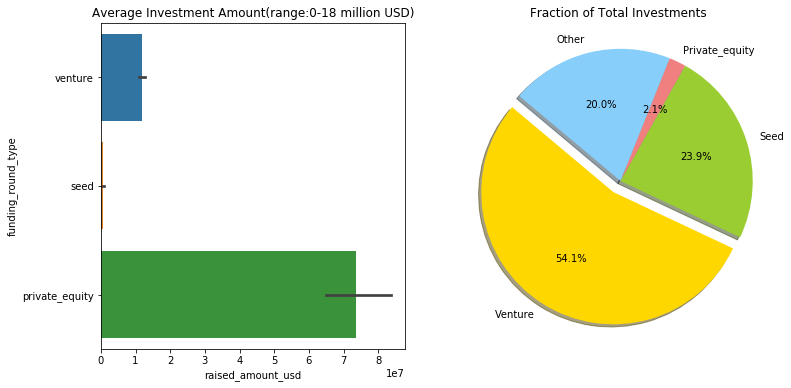

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
####--- We executed already before changing master_frame ---df = master_frame[master_frame['funding_round_type'].isin (['venture','seed','private_equity'])]

plt.figure(figsize=(12, 6))

# subplot 1: statistic=Average Amount of Investment
plt.subplot(1, 2, 1)
sns.barplot(y='funding_round_type', x='raised_amount_usd', data = df)
plt.title("Average Investment Amount(range:0-18 million USD)")

# subplot 2: statistic= Fraction of Total number of Investment.
###----We already calculated fraction values using below code:
###---100 * (df_type.funding_round_permalink.count()/len(master_frame.funding_round_permalink.unique()))
###---'Other' shows remaining investment type apart from Venture, Seed and Private_equity, So cal as (100 -(sum of these 3))

plt.subplot(1, 2, 2)
labels = 'Venture', 'Seed', 'Private_equity','Other'
sizes = [54.11, 23.88, 2.06, (100-(54.11+23.88+2.06)) ]   
colors = ['gold', 'yellowgreen','lightcoral','lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Fraction of Total Investments")
plt.axis('equal')
plt.show()

Note:From above graph, It is clear that venture type have around 11-12 million mean value and most of the investments are happening in it, Hence most suitable for Spark fund as per business case

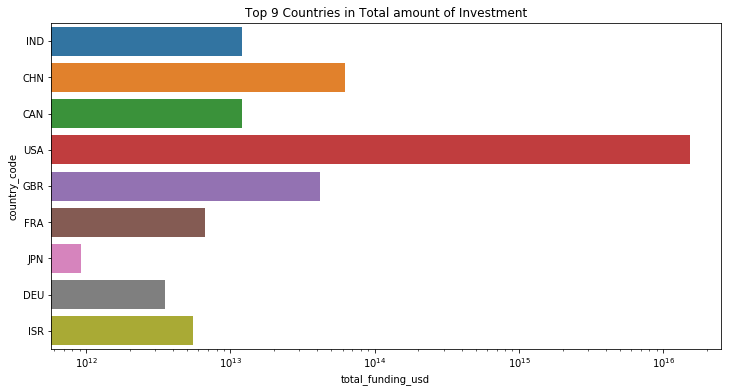

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(x= 'total_funding_usd',y='country_code',data = top9,estimator=np.sum)
plt.xscale('log')
plt.title("Top 9 Countries in Total amount of Investment")
plt.show()

So for above chart it is clear top3 countries are USA,CHN and GBR, but CHN is not english speaking country so will take next one which is IND.

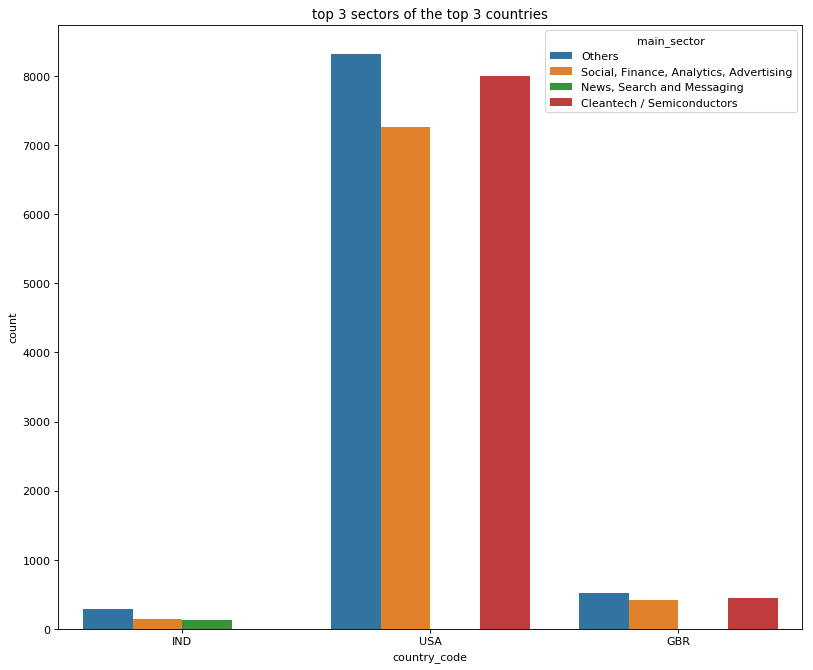

In [112]:
plt.figure(figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Main_sector"
sns.countplot(x='country_code', hue="main_sector", data=Decision_DF)
plt.title("top 3 sectors of the top 3 countries")
plt.show()

# Conclusion: Spark Funds can invest in USA or GBR in sectors like: Others and Social, Finance, Analytics, Advertising